<a href="https://colab.research.google.com/github/MaxenceAr/Projet_AAA_ARHOUL_REVEL/blob/espace-travail-maxence/Projet_AAA_ARHOUL_REVEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

colonnes :

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign: 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes: 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib

In [3]:
marketing = fetch_openml('bank-marketing', version=1, parser='auto',as_frame=True)

In [4]:
X, y = marketing.data, marketing.target

# **Data Exploratory Analysis**

In [62]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
45206    2
45207    2
45208    2
45209    1
45210    1
Name: Class, Length: 45211, dtype: category
Categories (2, object): ['1', '2']


we have to change all the '1' into 'no' (no subsribtion) et all the '2' into 'yes' (subsscribtion)

In [71]:
y=y.replace({'1': 'no', '2': 'yes'})

In [75]:
print(y)

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Class, Length: 45211, dtype: category
Categories (2, object): ['no', 'yes']


In [5]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


We have to change column names to facilitate understanding

In [10]:
nouveaux_noms = ['age', 'job','marital','education','default','balance','housing', 'loan', 'contact', 'day','month','duration', 'campaign','pdays','previous','poutcome']
X.columns = nouveaux_noms

In [13]:
X.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown


In [6]:
print (f"il y a {y.shape} échantillons")

il y a (45211,) échantillons


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
dtypes: category(9), int64(7)
memory usage: 2.8 MB


There are not any missing values.
There are 7 numeric columns and 9 categorical columns.

# Look at categorical values

Text(0.5, 1.0, 'target')

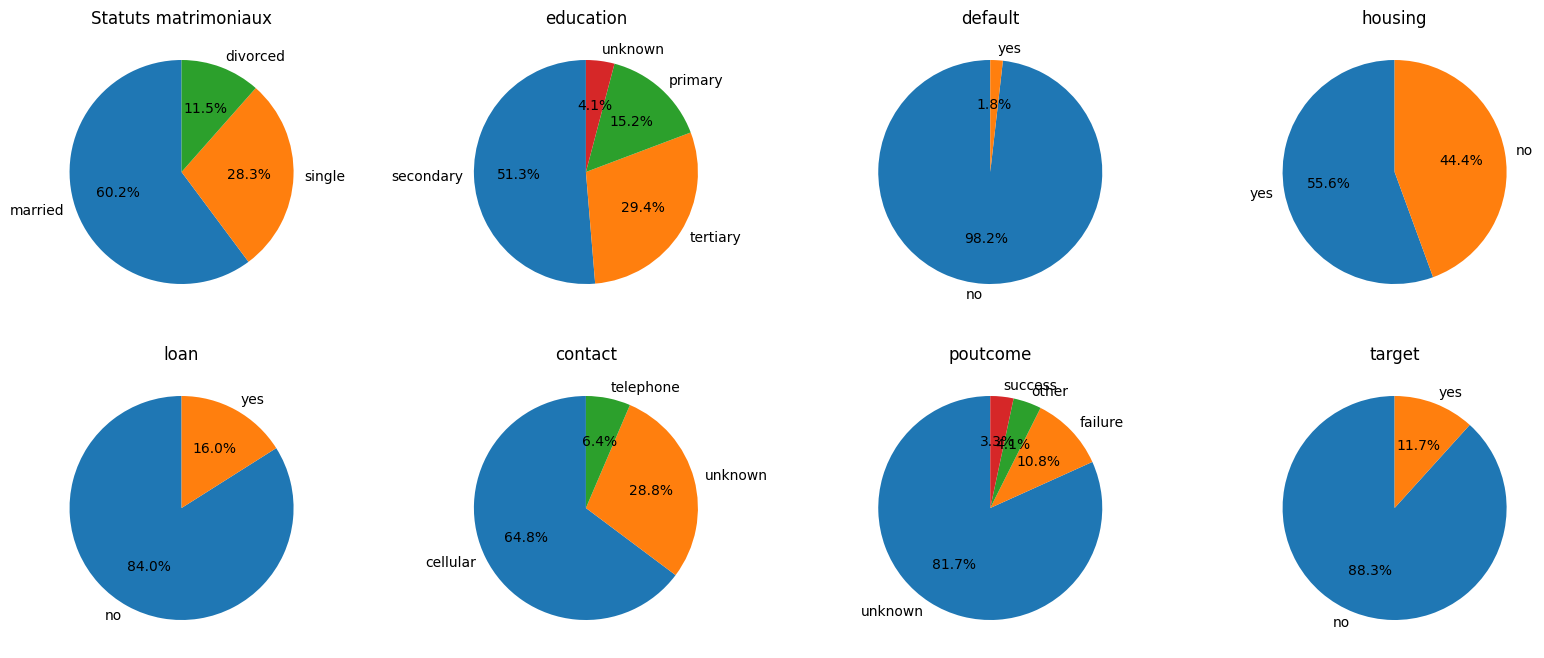

In [73]:
comptage_marital = X['marital'].value_counts()
etiquettes_marital = comptage_marital.index
valeurs_marital = comptage_marital.values

comptage_education = X['education'].value_counts()
etiquettes_education=comptage_education.index
valeurs_education=comptage_education

comptage_default = X['default'].value_counts()
etiquettes_default=comptage_default.index
valeurs_default=comptage_default.values

comptage_housing = X['housing'].value_counts()
etiquettes_housing=comptage_housing.index
valeurs_housing=comptage_housing.values

comptage_loan = X['loan'].value_counts()
etiquettes_loan=comptage_loan.index
valeurs_loan=comptage_loan.values

comptage_contact = X['contact'].value_counts()
etiquettes_contact=comptage_contact.index
valeurs_contact=comptage_contact.values

comptage_poutcome = X['poutcome'].value_counts()
etiquettes_poutcome=comptage_poutcome.index
valeurs_poutcome=comptage_poutcome.values

comptage_target = y.value_counts()
etiquettes_target=comptage_target.index
valeurs_target=comptage_target.values


# Créez la figure avec une grille de sous-graphiques
fig, axs = plt.subplots(2, 4, figsize=(20, 8))  # 1 ligne, 2 colonnes (2 graphiques côte à côte)

#first sub figure
axs[0,0].pie(valeurs_marital, labels=etiquettes_marital, autopct='%1.1f%%', startangle=90)
axs[0,0].set_title('Statuts matrimoniaux')

#second sub figure
axs[0,1].pie(valeurs_education, labels=etiquettes_education, autopct='%1.1f%%', startangle=90)
axs[0,1].set_title('education')

#third sub figure
axs[0,2].pie(valeurs_default, labels=etiquettes_default, autopct='%1.1f%%', startangle=90)
axs[0,2].set_title('default')

axs[0,3].pie(valeurs_housing, labels=etiquettes_housing, autopct='%1.1f%%', startangle=90)
axs[0,3].set_title('housing')

axs[1,0].pie(valeurs_loan, labels=etiquettes_loan, autopct='%1.1f%%', startangle=90)
axs[1,0].set_title('loan')

axs[1,1].pie(valeurs_contact, labels=etiquettes_contact, autopct='%1.1f%%', startangle=90)
axs[1,1].set_title('contact')

axs[1,2].pie(valeurs_poutcome, labels=etiquettes_poutcome, autopct='%1.1f%%', startangle=90)
axs[1,2].set_title('poutcome')

axs[1,3].pie(valeurs_target, labels=etiquettes_target, autopct='%1.1f%%', startangle=90)
axs[1,3].set_title('target')







In [51]:
X['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [52]:
X['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

# Look at numeric values

In [53]:
X.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


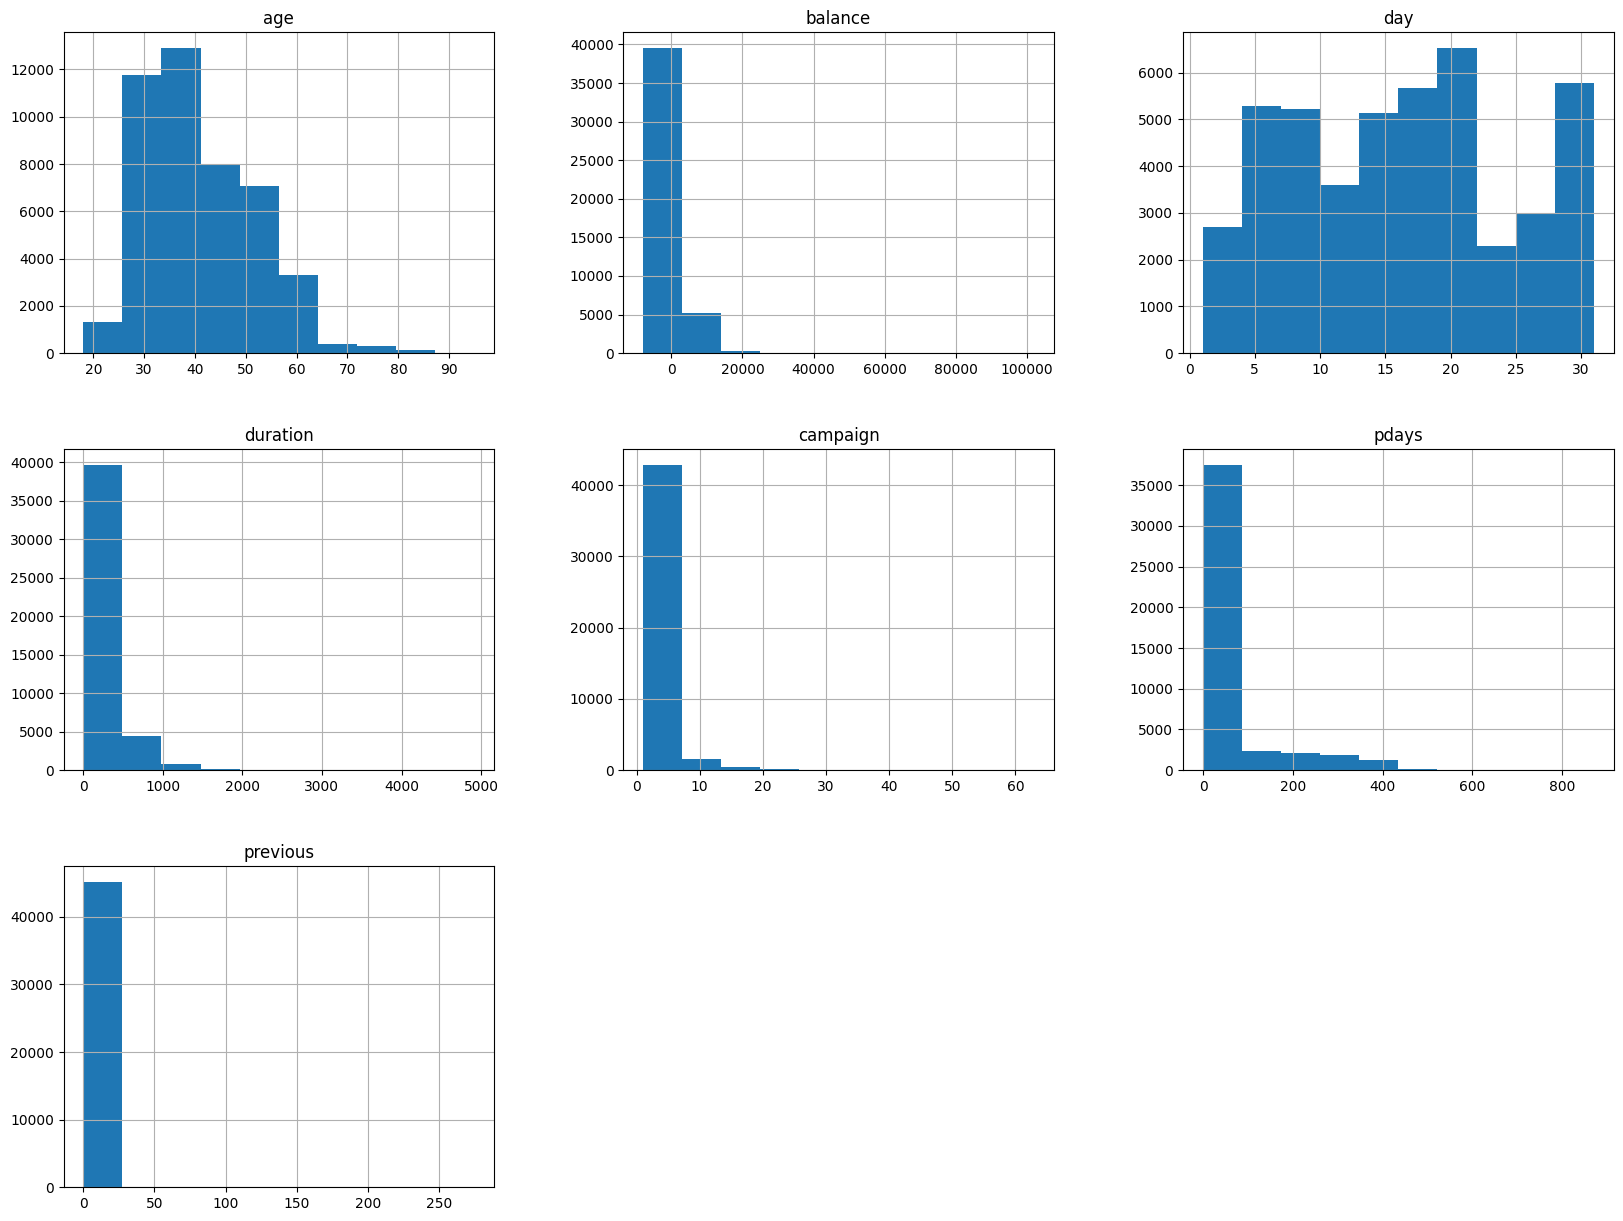

In [55]:
X.hist(figsize=(20,15))
plt.show()